## **Imports**

In [6]:
import torch # 2.3.0+cu118
import torch.nn as nn # 2.3.0+cu118
import matplotlib.pyplot as plt # 3.8.0


## **Definitions**

**L1 loss:** Also known as "absolute loss," L1 loss measures the sum of the absolute differences between predictions and true values. The formula for L1 loss is given by:
- **Formula** 


$$ L1 = \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

- **Usage:** L1 loss is robust to outliers, as it does not amplify large errors as much as L2 loss.

**L2 Loss:** Also known as "quadratic loss" or "mean squared error (MSE)," L2 loss measures the sum of the squared differences between predictions and true values.
- **Formula** 

$$ L2 = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

- **Usage:** It penalizes larger errors more than smaller ones, which can be useful when large errors are unacceptable. However, it is more sensitive to outliers.


3) **Lp Loss:** It is a generalization of L1 and L2 losses and measures the sum of the absolute differences raised to the power of \( p \) between the predictions and the true values.
- **Formula:**

$$ Lp = \sum_{i=1}^{n} |y_i - \hat{y}_i|^p $$

- **Usage:** Depending on the value of \( p \), it can be adjusted to be more robust to outliers (values closer to 1) or to penalize larger errors more (values closer to 2 or higher).

The idea behind L1 and L2 regularization is to add the weights to the loss calculation or the cost function to penalize the network for having higher weights.


## **Torch implementation**

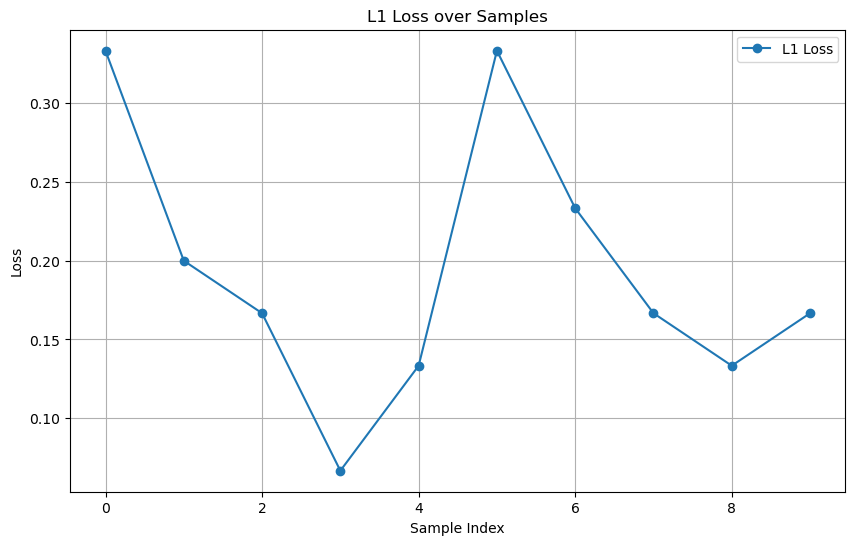

In [19]:

# Define the L1 loss function
class L1Loss(nn.Module):
    def __init__(self):
        super(L1Loss, self).__init__()
    
    def forward(self, y_pred, y_true):
        return torch.mean(torch.abs(y_pred - y_true))

# Function to calculate and plot the loss
def calculate_and_plot_loss(y_trues, y_preds):
    # Initializing the L1 loss function
    criterion = L1Loss()
    
    # Calculating the losses
    losses = [criterion(y_pred, y_true).item() for y_pred, y_true in zip(y_preds, y_trues)]
    
    # Plotting the losses
    plt.figure(figsize=(10, 6))
    plt.plot(losses, label='L1 Loss', marker='o')
    plt.xlabel('Sample Index')
    plt.ylabel('Loss')
    plt.title('L1 Loss over Samples')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Simulating more example data
    y_trues = [torch.tensor([1.0, 2.0, 3.0]) for _ in range(10)]
    y_preds = [
        torch.tensor([1.5, 2.5, 3.0]),
        torch.tensor([1.2, 2.3, 3.1]),
        torch.tensor([0.8, 1.9, 2.8]),
        torch.tensor([1.1, 2.0, 2.9]),
        torch.tensor([0.9, 2.1, 3.2]),
        torch.tensor([1.3, 2.4, 3.3]),
        torch.tensor([1.4, 2.2, 3.1]),
        torch.tensor([1.0, 2.5, 3.0]),
        torch.tensor([1.2, 2.1, 2.9]),
        torch.tensor([1.3, 2.0, 3.2])
    ]
    
    # Calculating and plotting the loss
    calculate_and_plot_loss(y_trues, y_preds)

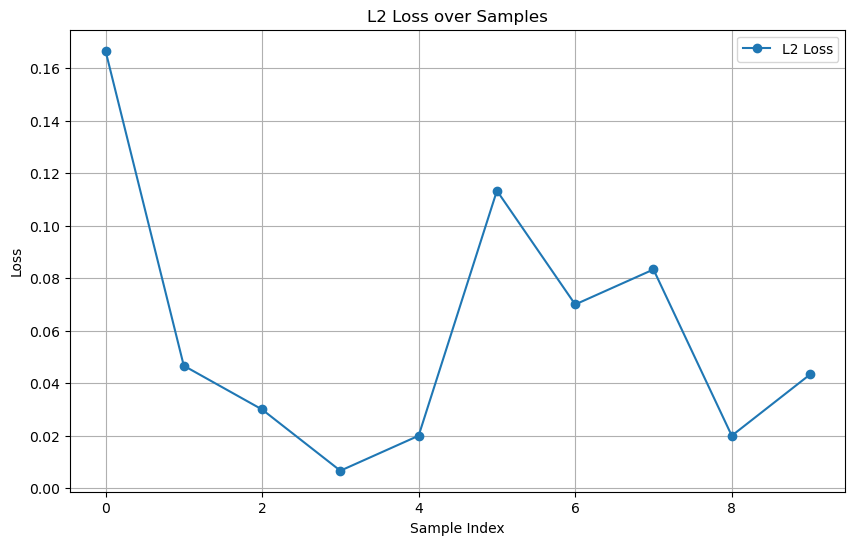

In [20]:
# Define the L2 loss function
class L2Loss(nn.Module):
    def __init__(self):
        super(L2Loss, self).__init__()
    
    def forward(self, y_pred, y_true):
        return torch.mean((y_pred - y_true) ** 2)

# Function to calculate and plot the loss
def calculate_and_plot_loss(y_trues, y_preds, loss_fn):
    # Calculating the losses
    losses = [loss_fn(y_pred, y_true).item() for y_pred, y_true in zip(y_preds, y_trues)]
    
    # Plotting the losses
    plt.figure(figsize=(10, 6))
    plt.plot(losses, label='L2 Loss', marker='o')
    plt.xlabel('Sample Index')
    plt.ylabel('Loss')
    plt.title('L2 Loss over Samples')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Simulating more example data
    y_trues = [torch.tensor([1.0, 2.0, 3.0]) for _ in range(10)]
    y_preds = [
        torch.tensor([1.5, 2.5, 3.0]),
        torch.tensor([1.2, 2.3, 3.1]),
        torch.tensor([0.8, 1.9, 2.8]),
        torch.tensor([1.1, 2.0, 2.9]),
        torch.tensor([0.9, 2.1, 3.2]),
        torch.tensor([1.3, 2.4, 3.3]),
        torch.tensor([1.4, 2.2, 3.1]),
        torch.tensor([1.0, 2.5, 3.0]),
        torch.tensor([1.2, 2.1, 2.9]),
        torch.tensor([1.3, 2.0, 3.2])
    ]
    
    # Initializing the L2 loss function
    criterion = L2Loss()
    
    # Calculating and plotting the loss
    calculate_and_plot_loss(y_trues, y_preds, criterion)

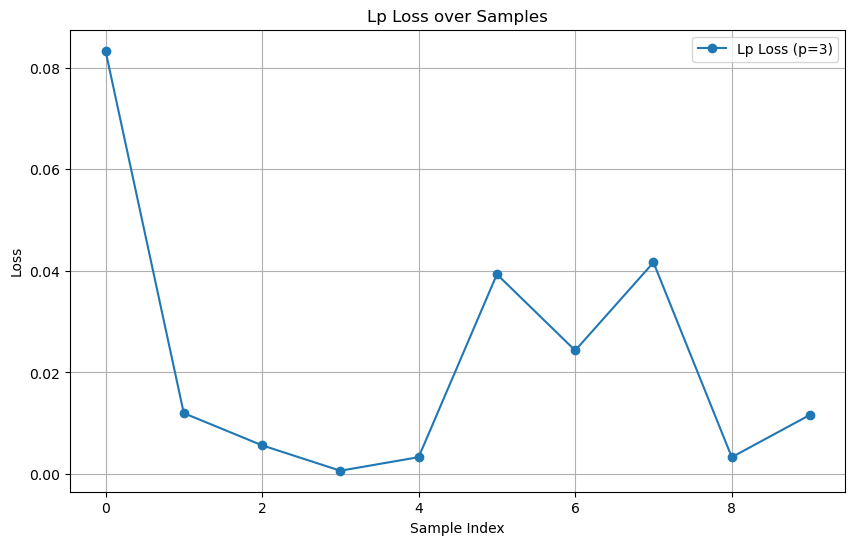

In [22]:

# Define the Lp loss function
class LpLoss(nn.Module):
    def __init__(self, p=2):
        super(LpLoss, self).__init__()
        self.p = p
    
    def forward(self, y_pred, y_true):
        return torch.mean(torch.abs(y_pred - y_true) ** self.p)

# Function to calculate and plot the loss
def calculate_and_plot_loss(y_trues, y_preds, loss_fn):
    # Calculating the losses
    losses = [loss_fn(y_pred, y_true).item() for y_pred, y_true in zip(y_preds, y_trues)]
    
    # Plotting the losses
    plt.figure(figsize=(10, 6))
    plt.plot(losses, label=f'Lp Loss (p={loss_fn.p})', marker='o')
    plt.xlabel('Sample Index')
    plt.ylabel('Loss')
    plt.title('Lp Loss over Samples')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Simulating more example data
    y_trues = [torch.tensor([1.0, 2.0, 3.0]) for _ in range(10)]
    y_preds = [
        torch.tensor([1.5, 2.5, 3.0]),
        torch.tensor([1.2, 2.3, 3.1]),
        torch.tensor([0.8, 1.9, 2.8]),
        torch.tensor([1.1, 2.0, 2.9]),
        torch.tensor([0.9, 2.1, 3.2]),
        torch.tensor([1.3, 2.4, 3.3]),
        torch.tensor([1.4, 2.2, 3.1]),
        torch.tensor([1.0, 2.5, 3.0]),
        torch.tensor([1.2, 2.1, 2.9]),
        torch.tensor([1.3, 2.0, 3.2])
    ]
    
    # Initializing the Lp loss function with p=1.5
    criterion = LpLoss(p=3)
    
    # Calculating and plotting the loss
    calculate_and_plot_loss(y_trues, y_preds, criterion)